# Trabalho ECDB

## Grupo 2


## Alunos: 

- Bruno Sá (Pg48932)
- Gonçalo Cardoso (Pg49034)
- Joana Gonçalves (Pg49835)
- Luís Ferreira (Pg49840)



# CYP P450 2C9 Inhibition_ Information

## Dataset Description: 

The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, the CYP P450 2C9 plays a major role in the oxidation of both xenobiotic and endogenous compounds.

## Task Description: 

Binary Classification. Given a drug SMILES string, predict CYP2C9 inhibition.

## Dataset Statistics: 

11,934 drugs.

## References:

[1] Veith, Henrike et al. “Comprehensive characterization of cytochrome P450 isozyme selectivity across chemical libraries.” Nature biotechnology vol. 27,11 (2009): 1050-5.


Tópicos (apagar depois):

-análise do conjunto de dados e sua breve descrição
- tarefas de pré-processamento dos dados (as que julgar necessárias)
- sumarização dos dados (estatística descritiva, exploração com recurso
a gráficos)
- análise estatística univariada (e.g. análise de “expressão” diferencial)
- análise estatística multivariada (não supervisionada): clustering,
redução de dimensionalidade/ visualização

In [2]:
#Librarys
import scipy.stats as stats
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, chisquare
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Importação dos dados e a sua Visualização

In [3]:
df_cyp2c9 = pd.read_csv("cyp2c9.csv")

In [4]:
df_features = pd.read_csv("cyp2c9_features.csv")

In [5]:
df_cyp2c9

,ids,smiles,Y
0,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1
1,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
2,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
3,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
4,645164.0,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,0
...,...,...,...
11929,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
11930,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0
11931,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
11932,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [6]:
df_features


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,362.07590,126.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,495.29578,194.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11930,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,210.08920,82.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11931,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11932,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,357.15762,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.1 - Concatenção dos dataframes

In [7]:
df = pd.concat([df_cyp2c9, df_features], axis=1)
df

,ids,smiles,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,645164.0,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,0,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11930,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11931,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11932,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Informações sobre os  dados:

### 2.1. Análise Descritiva:

O conjunto de dados a ser analisados representa uma coleção de compostos químicos, cada um representado por um ID único, uma string SMILES (uma representação compacta da estrutura molecular) e várias propriedades e características da molécula. Essas propriedades incluem descritores numéricos da estrutura molecular, como MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex e MinAbsEStateIndex, bem como a presença ou ausência de várias subestruturas moleculares, como fr_sulfide, fr_sulfonamd e fr_sulfone. A coluna Y é uma variável binária que indica se a molécula inibe (valor 1) ou não (valor 0) a enzima cyp2c9 .

2.1.1 - Análise dos metadados

In [8]:
# Ver as dimensões do DataFrame

print("Dimensões:", df_cyp2c9.shape)

Dimensões: (11934, 3)


In [9]:
# Ver as primeiras linhas do DataFrame

print(df_cyp2c9.head())

         ids                                             smiles  Y
0  1960010.0       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21  1
1   644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1
2   644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1
3   644968.0               COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1  1
4   645164.0  CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...  0


In [10]:
# Ver os tipos de dados de cada coluna

print(df_cyp2c9.dtypes)

ids       float64
smiles     object
Y           int64
dtype: object


In [11]:
# Ver o número de valores únicos em cada coluna

print(df_cyp2c9.nunique())

ids       11934
smiles    11934
Y             2
dtype: int64


In [12]:
# Ver a quantidade de valores ausentes em cada coluna

df_cyp2c9.isnull().sum()



ids       0
smiles    0
Y         0
dtype: int64


- Vimos também que não há valores omissos nem valores duplicados no dataframe  " df_cyp2c9 " pelo que este tipo de pré-processamento pode ser ultrapassado.

2.1.2 - Análise do dados:

In [13]:
# Ver as dimensões do DataFrame
print("Dimensões: ", df_features.shape)

Dimensões:  (11934, 208)


In [14]:
# Ver as primeiras linhas do DataFrame
print(df_features.head())

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.820479       -0.183140          12.820479           0.128619   
1        6.126257        0.660427           6.126257           0.660427   
2        5.719940       -0.219974           5.719940           0.075509   
3       12.040634       -0.208718          12.040634           0.006714   
4       13.082813       -0.044883          13.082813           0.018472   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.457873  362.476         344.332   362.07590                126.0   
1  0.756902  255.708         245.628   255.05632                 88.0   
2  0.605920  421.549         390.301   421.25900                164.0   
3  0.728361  324.344         308.216   324.13348                122.0   
4  0.457249  495.628         458.332   495.29578                194.0   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  0.0  ...         1.0  

In [15]:
# Ver os tipos de dados de cada coluna
print(df_features.dtypes)

MaxEStateIndex       float64
MinEStateIndex       float64
MaxAbsEStateIndex    float64
MinAbsEStateIndex    float64
qed                  float64
                      ...   
fr_thiazole          float64
fr_thiocyan          float64
fr_thiophene         float64
fr_unbrch_alkane     float64
fr_urea              float64
Length: 208, dtype: object


In [16]:
# Ver o número de valores únicos em cada coluna
print(df_features.nunique())

MaxEStateIndex       11574
MinEStateIndex       11439
MaxAbsEStateIndex    11574
MinAbsEStateIndex    11304
qed                  10876
                     ...  
fr_thiazole              4
fr_thiocyan              2
fr_thiophene             3
fr_unbrch_alkane        20
fr_urea                  5
Length: 208, dtype: int64


In [17]:
# Ver a quantidade de valores ausentes em cada coluna
print(df_features.isnull().sum())

MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


### Descrição das Features

Nas colunas do dataframe features estão representadas algumas propriedades dos compostos químicos que são avaliadas neste tipo de estudo, onde se pretende demonstrar se um composto tem capacidade de inibição de um certo gene.

A escolha das propriedades a ser analisadas vai ser baseada na sua possível importância biológica. 

As propriedades a ser analisadas são:

- BertzCT : Representa a complexidade estrutural.

- MaxAbsEStateIndex :  Pode ser usado para identificar o átomo mais doador ou retirador de eletrões no composto, o que pode ser importante para entender a reatividade ou atividade biológica do composto.

- MinAbsEStateIndex : Pode ser usado para identificar o átomo menos doador ou retirador de eletrões no composto, o que pode ser importante para entender a reatividade ou atividade biológica do composto.

- qed :  Estima de forma quantitativa a drug-likeness. Varia de 0 a 1, com pontuações mais altas indicando uma maior probabilidade de o composto ser oralmente biodisponível e ter propriedades farmacológicas desejáveis.

- MolWt : MolWt é um descritor que representa o peso molecular de um composto. 

- NumValenceElectrons : Número de elétrões de valência

- FpDensityMorgan3 : Grau de semelhança entre moleculas diferentes no nível 3, sendo usado para prever as suas propriedades, tais como solubilidade, toxicidade e atividade contra um alvo específico.


In [18]:
df["BertzCT"]

0         745.10614
1         661.56570
2         974.84500
3         818.19965
4        1197.71120
            ...    
11929     483.83765
11930     316.54962
11931     891.82336
11932     747.82825
11933     373.30325
Name: BertzCT, Length: 11934, dtype: float64

In [19]:
for x in df:
    print(x)

ids
smiles
Y
MaxEStateIndex
MinEStateIndex
MaxAbsEStateIndex
MinAbsEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EStat

# 3. Pré - processamento



- Algumas tarefas de pré-processamento que podem ser necessárias incluem:

- Remoção de valores duplicados
- Tratamento de valores ausentes
- Conversão de tipos de dados
- Normalização de dados
- Remoção de colunas irrelevantes

##### - Neste caso, não há necessidade de realizar nenhum pré-processamento nos dados, visto que não há valores omissos nem duplicados. No entanto, para a análise estatística univariada e multivariada, é necessário separar os dados em grupos, um para os compostos que inibem a enzima CYP2C9 e outro para os que não inibem.

###  3.1 - Criação e Divisão em dataframes dos compostos que inibiam e não inibiam o CYP2C9

In [20]:
df_cyp2c9_y_1 = df_cyp2c9[df_cyp2c9['Y'] == 1]
df_cyp2c9_y_0 = df_cyp2c9[df_cyp2c9["Y"] == 0]

# 4 - Sumarização dos dados


### 4.1 - Estatística Descritiva

In [21]:
df_cyp2c9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ids     11934 non-null  float64
 1   smiles  11934 non-null  object 
 2   Y       11934 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 279.8+ KB


In [22]:
df_features.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,...,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000
mean,11.274808,-0.879382,11.274808,0.192623,0.611521,355.016700,334.581007,354.626917,131.051114,0.0,...,0.101894,0.073571,0.011061,0.004190,0.009804,0.032261,0.000168,0.062929,0.127786,0.044076
std,2.689638,1.442954,2.689638,0.224866,0.191307,108.988404,103.017461,108.873587,40.828041,0.0,...,0.325473,0.271160,0.104592,0.064595,0.101878,0.189071,0.012945,0.250991,0.774506,0.213281
min,2.269884,-7.603764,2.269884,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.896393,-1.063285,10.896393,0.043124,0.481696,289.292000,272.175000,289.024430,106.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.242406,-0.402087,12.242406,0.116725,0.632182,347.435000,327.159000,347.133635,128.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.924319,-0.062750,12.924319,0.237865,0.772312,409.507250,386.231750,409.140095,152.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,3.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,4.000000


In [23]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Columns: 208 entries, MaxEStateIndex to fr_urea
dtypes: float64(208)
memory usage: 18.9 MB


### 4.2 - Apoio gráfico à Sumarização

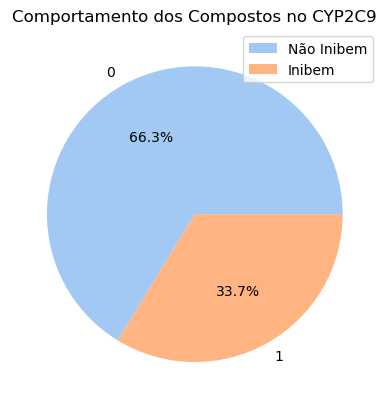

In [24]:
counts = df_cyp2c9['Y'].value_counts()
colours = sns.color_palette("pastel")[0:2]
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=colours)


plt.title('Comportamento dos Compostos no CYP2C9')
plt.legend(["Não Inibem","Inibem"])
plt.show()

**Conclusão** : Pelo gráfico conseguimos perceber que há mais compostos que não inibem a enzima cyp2c9 (66.3%) do que os que inibem (33.7%)

De seguida, apresentam-se gráficos para uma análise da distribuição das variáveis numéricas em estudo:

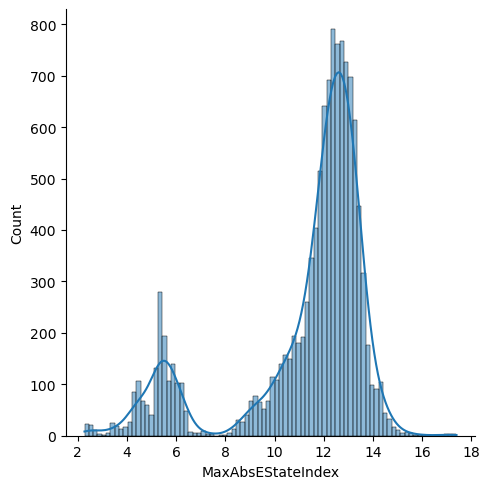

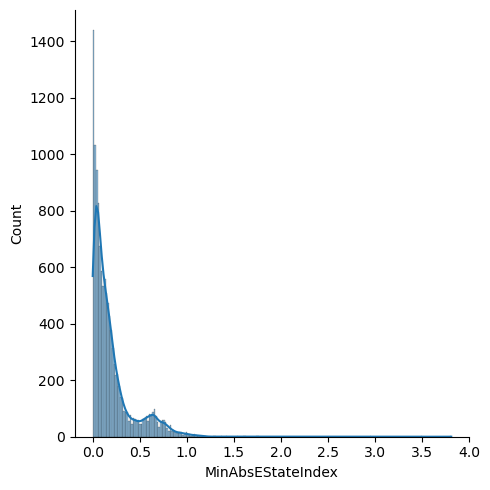

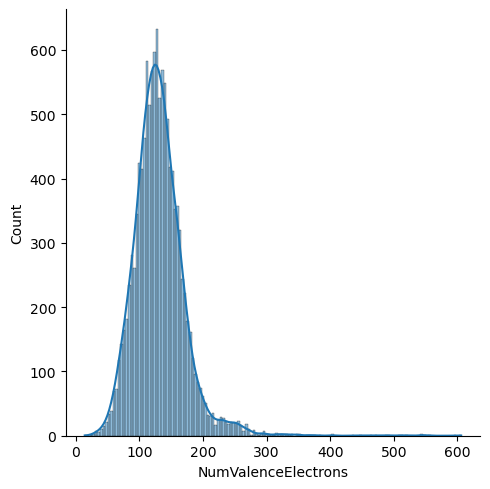

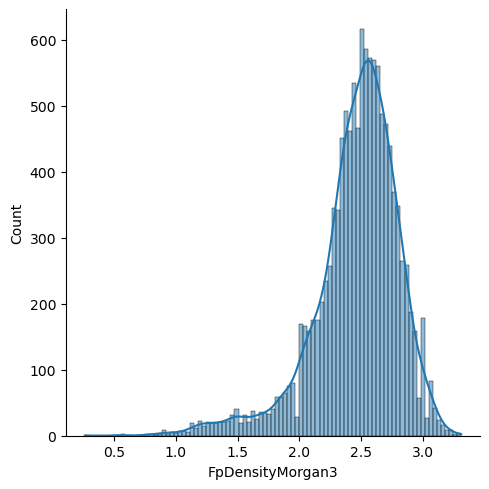

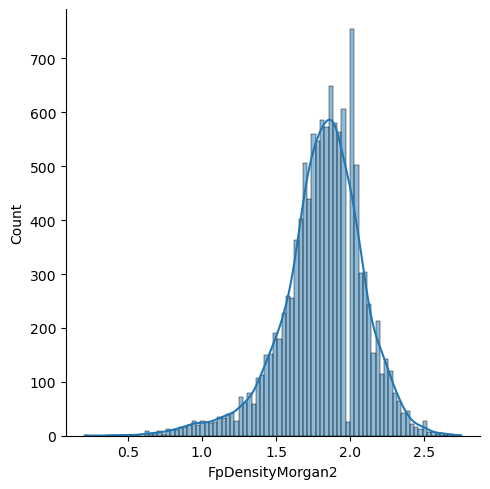

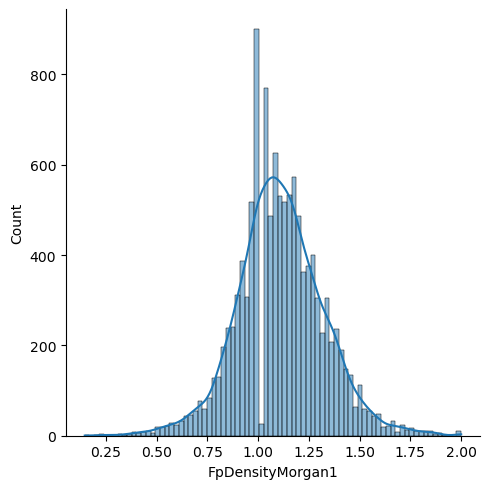

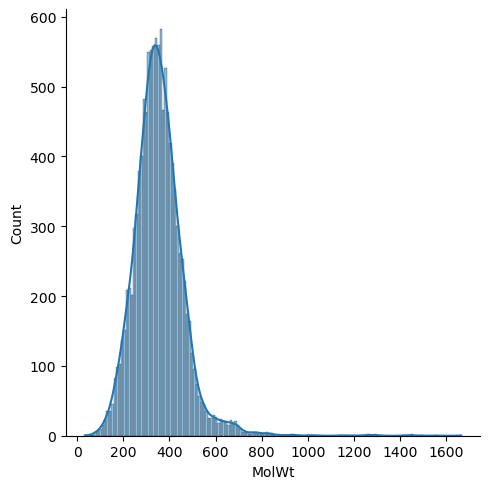

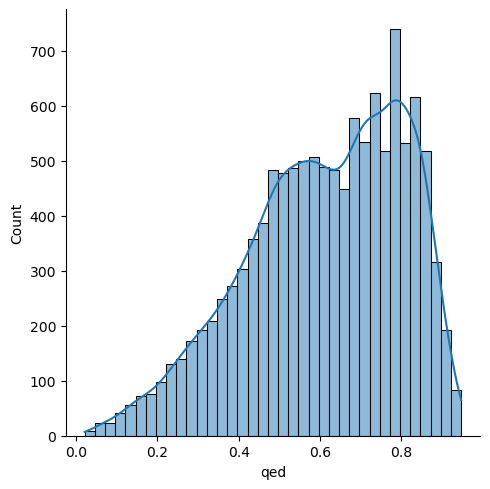

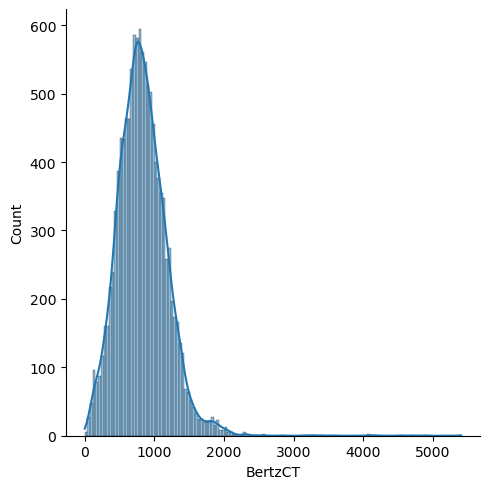

In [25]:
l = ["MaxAbsEStateIndex","MinAbsEStateIndex","NumValenceElectrons","FpDensityMorgan3","FpDensityMorgan2","FpDensityMorgan1","MolWt","qed","BertzCT"]
for col in l:
    sns.displot(df[col], kde=True)
    plt.show()


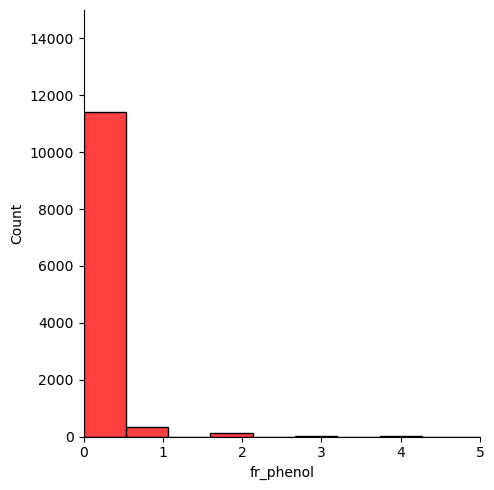

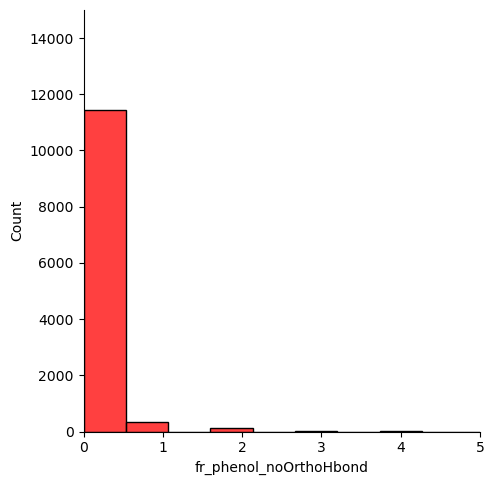

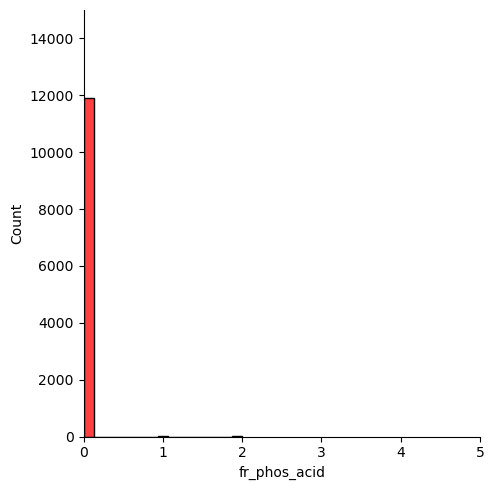

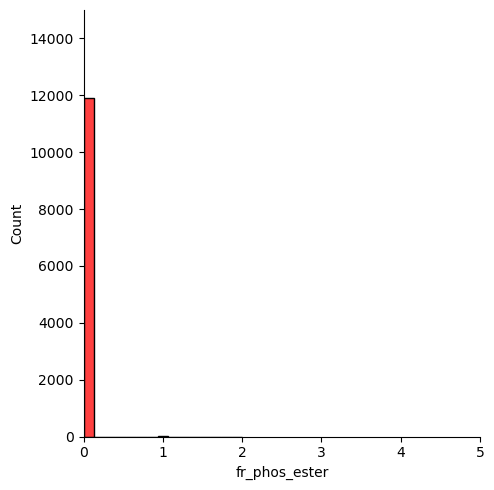

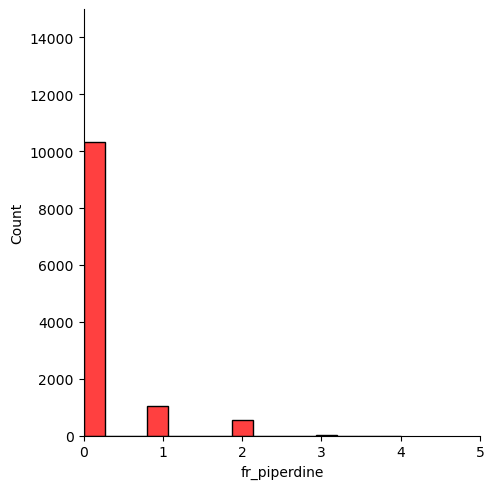

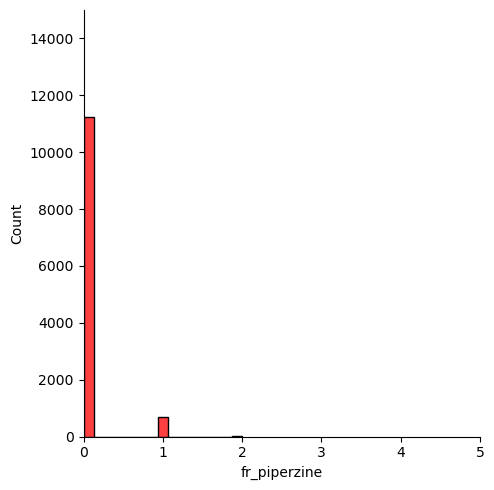

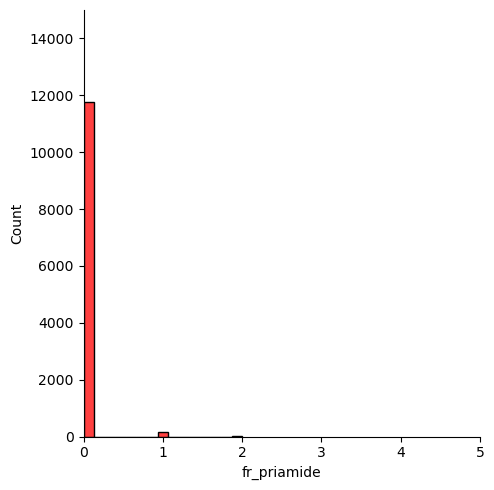

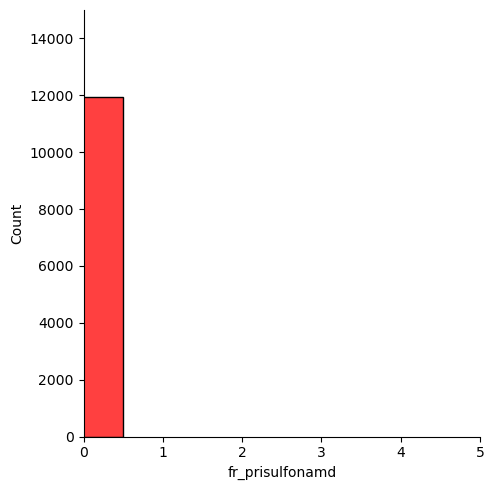

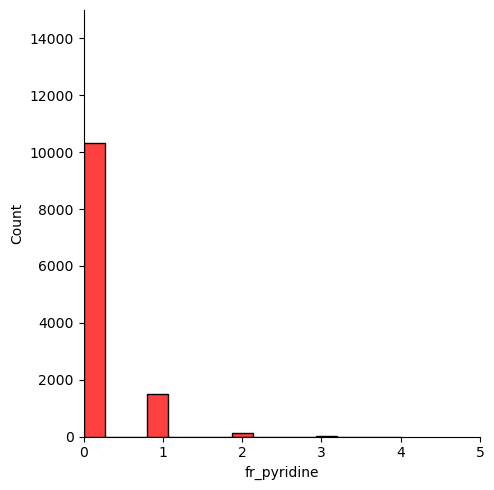

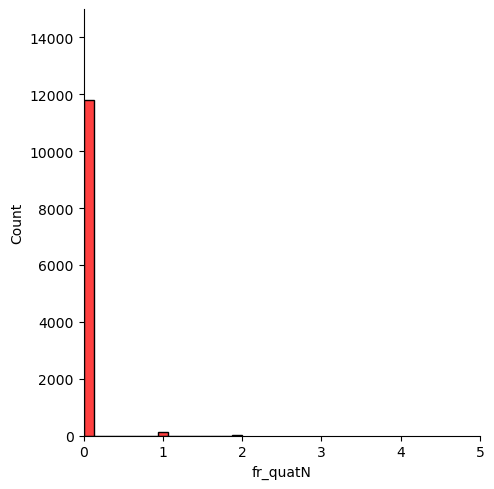

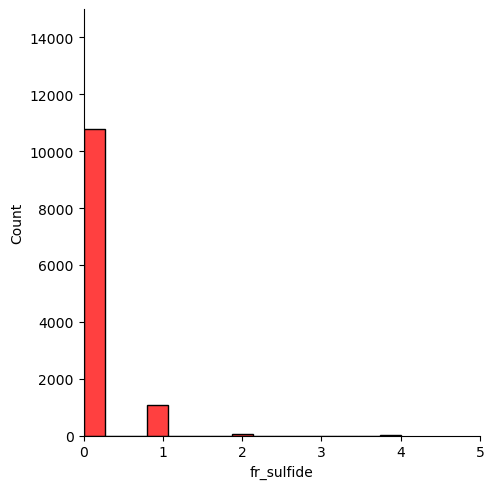

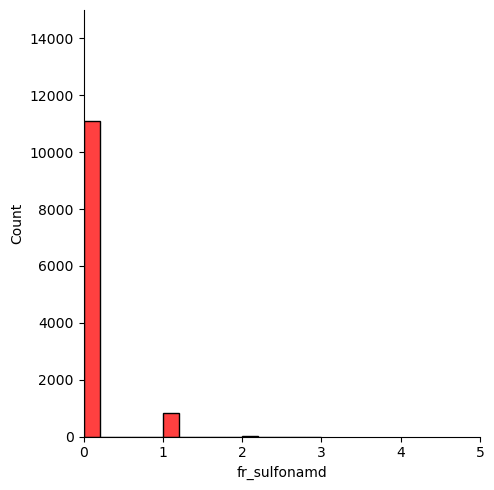

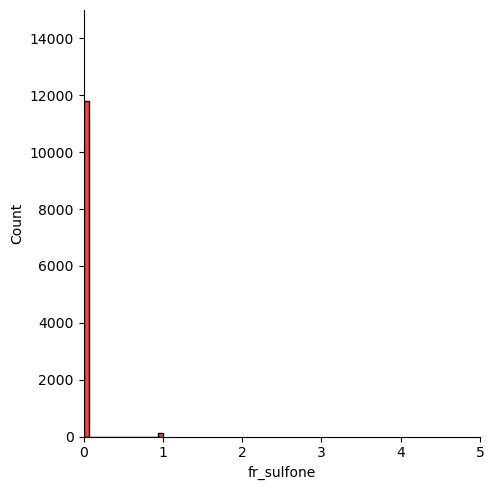

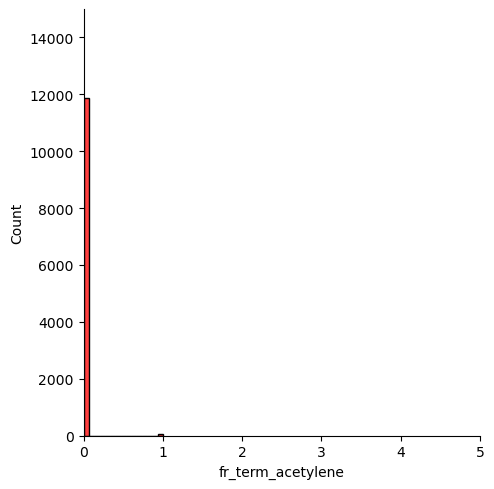

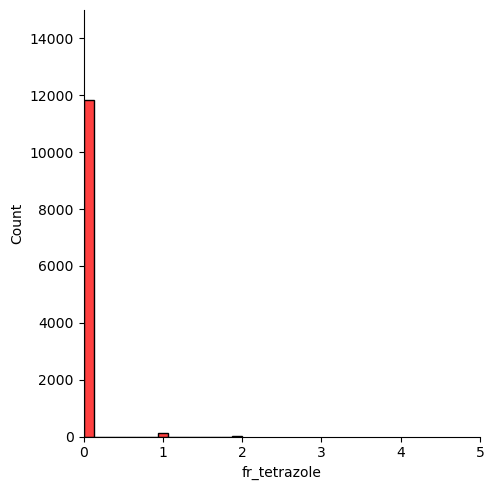

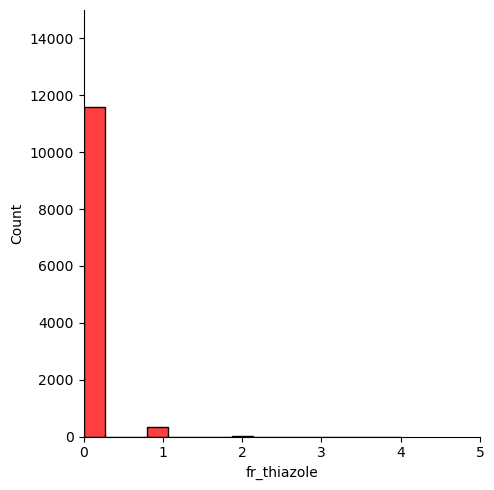

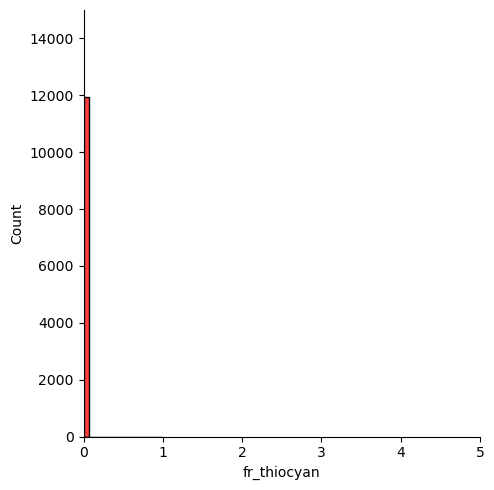

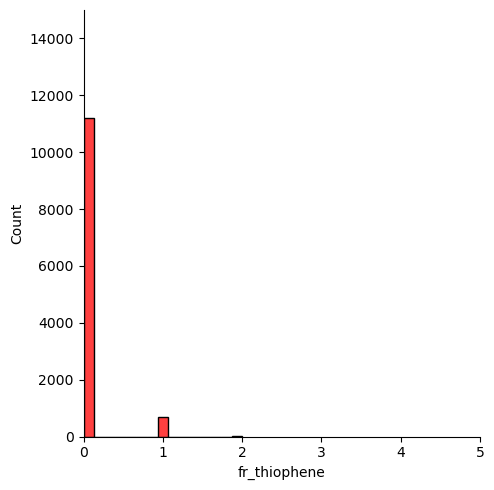

In [26]:
import matplotlib.ticker as ticker

for col in df.select_dtypes(include=np.number).columns[190:208]:
    g = sns.displot(df[col], kde=False, color='red')
    g.set(ylim=(0, 15000))
    g.set(xlim=(0,5))   
    g.ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

# 5.  Análise estatística univariada

Para a análise estatística univariada, podemos ainda usar testes estatísticos para identificar compostos com características diferentes em relação à variável 'Y'. Como Y é uma variável binária, podemos usar o teste t de Student para comparar as médias das variáveis independentes entre as duas classes de Y.

### Testes Estatísticos

**H0:** Não há diferenças significativas entre o descritor químico em estudo e a presença de inibição da enzima CYP2C9.


**H1:** Há diferenças significativas entre descritor químico em estudo e a presença de inibição da enzima CYP2C9.

In [27]:
# T-test geral

descritores = df.iloc[:, 3:126:]

S=[]
NS=[]
for x, t in enumerate(descritores):
    not_inibited = df[df['Y'] == 0][t]
    inibited = df[df['Y'] == 1][t]
    p_value = ttest_ind(not_inibited, inibited)[1]
    if p_value < 0.05:
        S.append(t)
    else:
        NS.append(t)

print(f"Número de descritores químicos que apresentam diferenças significativas na inibição da enzima: {len(S)}")
print(f"Número de descritores químicos que não apresentam diferenças significativas na inibição da enzima: {len(NS)}")
print(f"Lista de descritores químicos que apresentam diferenças significativas na inibição da enzima: {S}")
print(f"Lista de descritores químicos que não apresentam diferenças significativas na inibição da enzima: {NS} ")

Número de descritores químicos que apresentam diferenças significativas na inibição da enzima: 107
Número de descritores químicos que não apresentam diferenças significativas na inibição da enzima: 16
Lista de descritores químicos que apresentam diferenças significativas na inibição da enzima: ['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA11', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SM

##### **Qed**

In [28]:
med_inhib = df[df["Y"] == 1]["qed"]
med_not_inhib = df[df["Y"] == 0]["qed"]
ttest_ind(med_inhib, med_not_inhib)


Ttest_indResult(statistic=-16.600203456391156, pvalue=3.366466874219499e-61)

**Conclusão:** Como a estatistica é de 16.6 e o valor-p é menor que 0.05 (p-value = 3.37e-611.05e-95), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de qed para os compostos com e sem inibição.

##### **BertzCT**

In [29]:
med_inhib = df[df["Y"] == 1]["BertzCT"]
med_not_inhib = df[df["Y"] == 0]["BertzCT"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=35.58160782492257, pvalue=1.2079120315516387e-263)

**Conclusão:** Como a estatistica é de 35.58 e o valor-p é menor que 0.05 (p-value = 1.21e-263), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de BertzCT para os compostos com e sem inibição.

##### **FpDensityMorgan3**

In [30]:
med_inhib = df[df["Y"] == 1]["FpDensityMorgan3"]
med_not_inhib = df[df["Y"] == 0]["FpDensityMorgan3"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=-0.04940446432587252, pvalue=0.9605977973988798)

**Conclusão:** Como a estatistica é de 0.049 e o valor-p é menor que 0.05 (p-value = 0.96), a hipótese nula não é rejeitada portanto, podemos concluir que não há diferenças significativas entre os valores de FpDensityMorgan3 para os compostos com e sem inibição.

##### **MinAbsEStateIndex**

In [31]:
med_inhib = df[df["Y"] == 1]["MinAbsEStateIndex"]
med_not_inhib = df[df["Y"] == 0]["MinAbsEStateIndex"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=-12.4565577597981, pvalue=2.1377206519735e-35)

**Conclusão:** Como a estatistica é de -12.46 e o valor-p é menor que 0.05 (p-value = 2.14e-35), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de MinAbsEStateIndex para os compostos com e sem inibição.

##### **MaxAbsEStateIndex**

In [32]:
med_inhib = df[df["Y"] == 1]["MaxAbsEStateIndex"]
med_not_inhib = df[df["Y"] == 0]["MaxAbsEStateIndex"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=20.94654931453465, pvalue=1.0532128801057078e-95)

**Conclusão:** Como a estatistica é de 20.95 e o valor-p é menor que 0.05 (p-value = 1.05e-95), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de MaxAbsEStateIndex para os compostos com e sem inibição.

##### **MolWt**

In [33]:
med_inhib = df[df["Y"] == 1]["MolWt"]
med_not_inhib = df[df["Y"] == 0]["MolWt"]
ttest_ind(med_inhib, med_not_inhib)


Ttest_indResult(statistic=25.98903245803305, pvalue=6.786164710564847e-145)

**Conclusão:** Como a estatistica é de 25.90 e o valor-p é menor que 0.05 (p-value = 6.79e-145), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de MolWt para os compostos com e sem inibição.

##### **NumValenceElectrons**

In [34]:
med_inhib = df[df["Y"] == 1]["NumValenceElectrons"]
med_not_inhib = df[df["Y"] == 0]["NumValenceElectrons"]
ttest_ind(med_inhib, med_not_inhib)


Ttest_indResult(statistic=19.978910057061732, pvalue=2.2378971679479476e-87)

**Conclusão:** Como a estatistica é de 19.98 e o valor-p é menor que 0.05 (p-value = 2.24e-87), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de NumValenceElectrons para os compostos com e sem inibição.

**H0:** O descritor químico tem expressão diferencial significativa

**H1:** O descritor químico não tem expressão diferencial significativa

### Teste do Qui-Quadrado

**H0:** A quantidade de grupos funcionais em cada composto influência na inibição do gene CYP2C9.


**H1:** A quantidade de  grupos funcionais em cada composto não influência na inibição do gene CYP2C9.

In [35]:
import scipy.stats
from scipy.stats import chi2
compostos = df.iloc[:, 126:]
compostos1 = compostos.insert(loc = 0,
          column = 'Y',
          value = df["Y"])
S = []
NS = []

for x, y in enumerate(compostos):
    a = pd.crosstab(compostos["Y"],compostos[y])
    b = scipy.stats.chi2_contingency(a)[1]
    if b > 0.05:
        NS.append(y)
    else:
        S.append(y)
S.pop(0) 

print(f"Número de grupos funcionais que apresentam diferenças significativas na inibição da enzima: {len(S)}")
print(f"Número de grupos funcionais que não apresentam diferenças significativas na inibição da enzima: {len(NS)}")
print(f"Lista de grupos funcionais que apresentam diferenças significativas na inibição da enzima: {S}")
print(f"Lista de grupos funcionais que não apresentam diferenças significativas na inibição da enzima: {NS} ")

Número de grupos funcionais que apresentam diferenças significativas na inibição da enzima: 66
Número de grupos funcionais que não apresentam diferenças significativas na inibição da enzima: 19
Lista de grupos funcionais que apresentam diferenças significativas na inibição da enzima: ['fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_aniline', 'fr_aryl_methyl', 'fr_benzene', 'fr_bicyclic', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_oxazo

**Conclusão** : Segundo a análise estatística anterior conseguímos concluir que existem 66 grupos funcionais que influenciam significativamente para um nivel de significância para 0.05 a inibição do gene CYP2C9 e 19 grupos funcionais não influenciam significativamente para um nivel de significância para 0.05 a inibição do gene CYP2C9. 

Podemos por fim avaliar a correlação entre os descritores químicos escolhidos,  gerarando uma matriz de correlação:

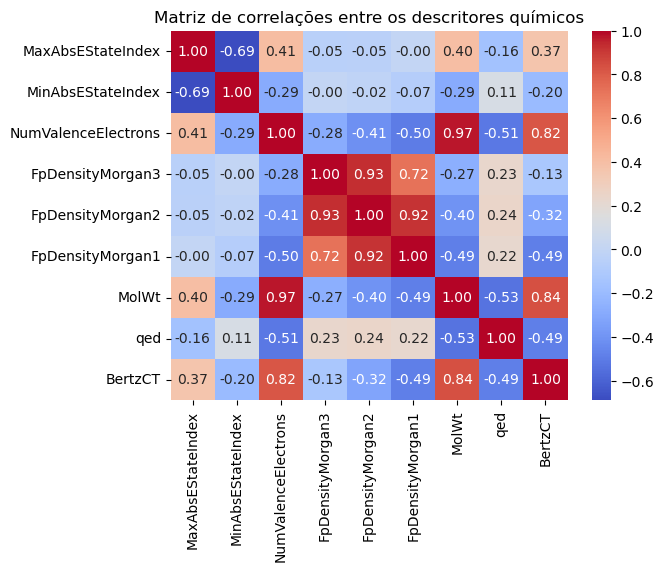

In [36]:
sns.heatmap(df[l].corr(), cmap='coolwarm', annot= True, fmt=".2f")
plt.title('Matriz de correlações entre os descritores químicos')
plt.show()

# 6. - Análise estatística multivariada (não supervisionada): clustering, redução de dimensionalidade/ visualização

Para começar o último tópico começamos por retirar colunas desnecessáriaS para esta análise nomeadamente a variável categórica "smiles" e os "ids".


In [37]:
df_1 = df.drop(['ids', 'smiles', 'Y'], axis=1)
df_1 = df_1.drop(df_1.iloc[:, 123:], axis=1)
df_1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,362.07590,126.0,0.0,...,5.0,0.0,7.0,5.0,0.0,1.0,1.0,3.0,2.66100,99.7840
1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,2.0,1.0,4.0,2.0,0.0,0.0,0.0,3.0,3.79210,72.2647
2,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,8.0,0.0,8.0,6.0,0.0,1.0,1.0,4.0,2.73890,118.7370
3,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,7.0,1.0,8.0,6.0,0.0,0.0,0.0,3.0,1.06010,85.8887
4,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,495.29578,194.0,0.0,...,9.0,1.0,10.0,10.0,0.0,2.0,2.0,5.0,2.28752,136.7977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,4.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,0.13350,65.7418
11930,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,210.08920,82.0,0.0,...,4.0,1.0,4.0,1.0,0.0,2.0,2.0,3.0,0.37390,52.1998
11931,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,6.0,1.0,7.0,2.0,1.0,3.0,4.0,6.0,1.00920,99.0888
11932,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,357.15762,138.0,0.0,...,5.0,2.0,6.0,2.0,2.0,1.0,3.0,4.0,1.06960,91.5416


Posteriormente procedemos á padronização dos dados númericos para que estes tenham média zero e desvio padrão 1

In [38]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1)
df_scaled

array([[ 0.57470029,  0.48253239,  0.57470029, ..., -0.12146359,
        -0.14705449,  0.1342937 ],
       [-1.91429792,  1.06716821, -1.91429792, ..., -0.12146359,
         0.47438237, -0.81980567],
       [-2.06537174,  0.45700395, -2.06537174, ...,  0.6022241 ,
        -0.1042555 ,  0.79139782],
       ...,
       [ 0.78673737, -0.09737207,  0.78673737, ...,  2.04959948,
        -1.05456877,  0.11019099],
       [ 0.7082882 , -0.19525339,  0.7082882 , ...,  0.6022241 ,
        -1.02138445, -0.15147188],
       [-0.20794688,  0.27620809, -0.20794688, ..., -1.56883897,
        -1.07681985, -1.19816839]])

### 6.1 Redução da Dimensionalidade (PCA):

In [39]:
componentes = 2     
for x in range(2,50):
    pca = PCA(n_components=x)
    pca.fit(df_scaled)
    reduced = pca.transform(df_scaled)
    if (sum(pca.explained_variance_ratio_)) > 0.7:
        break
    componentes +=1

print(f"Número de componentes que explicam 70% dos dados: {componentes}")

Número de componentes que explicam 70% dos dados: 11


In [40]:
pca = PCA(n_components=11)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[ 0.20644811,  0.86789912, -0.07667126, ..., -0.31707993,
         2.71109327,  0.78710463],
       [-7.2404753 , -5.03751076, -1.28743729, ...,  2.53008217,
         0.95175209,  2.83775062],
       [ 3.45785286, -1.46308955, -4.10728798, ..., -1.22330877,
        -1.04845277,  0.32417778],
       ...,
       [ 5.90686489,  6.17287678, -3.16389084, ...,  2.2134913 ,
         2.72387751,  0.49891557],
       [ 3.5585227 ,  6.3076824 , -2.40031722, ...,  0.42038599,
         2.45461777,  0.43391797],
       [-6.3239353 ,  3.05493285,  3.37004073, ..., -2.39006121,
        -1.7546346 , -0.04159035]])

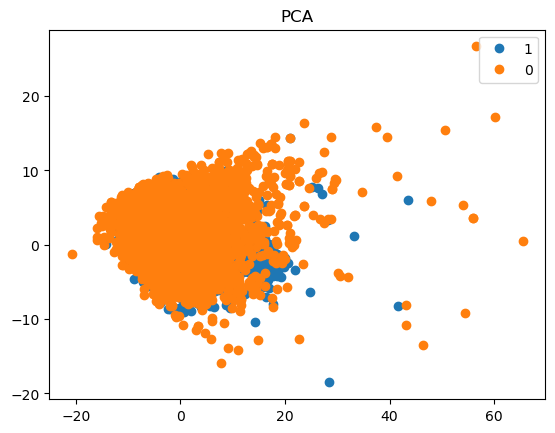

In [41]:
for inib in df['Y'].unique():
    ini = df.index[df['Y']==inib]-1
    plt.plot(df_pca[ini,0],df_pca[ini,1], 'o' , label=inib)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter= 250)
points = tsne.fit_transform(df_scaled)

for inib in df['Y'].unique():
    ini = df.index[df['Y']==inib]-1
    plt.plot(points[ini,0],points[ini,1], 'o' , label=inib)
plt.title("TSNE")
plt.legend(loc='best', shadow=False)
plt.show()

### 6.2. K-means Clustering

Determinação do k

In [42]:
from sklearn.cluster import KMeans
k_values = range(1, 11)
lista = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=43)
    kmeans.fit(df_scaled)
    lista.append(kmeans.inertia_)
plt.plot(k_values, lista, 'bx-')
plt.xlabel('clusters')
plt.ylabel('distancias')
plt.show()

c:\Users\gonca\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [43]:
from sklearn.cluster import KMeans   
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append((score, k))

c:\Users\gonca\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
silhouette_coefficients

[0.15580162877639214,
 0.11198407401479493,
 0.1067436870524692,
 0.09299648287931733,
 0.09580575224030893,
 0.09531858275757192,
 0.08496005680617111,
 0.0838692089671168,
 0.08156916828727304]

**Conclusão**: De acordo com as análises feitas anteriormente, determinamos um valor de k=2, no entanto estes métodos não são exatos, sendo apenas uma aproximação.

In [ ]:
k=2   
km1 = KMeans(n_clusters=k, max_iter=1000)
km1.fit(df_scaled)
labels=km1.predict(df_scaled)
centroids=km1.cluster_centers_

pd.crosstab(labels, df["Y"], rownames=["clusters"])

**Conclusão**: Através das análises das diferentes analises de PCA e K-means clustering, é possível concluir que  

Visualização

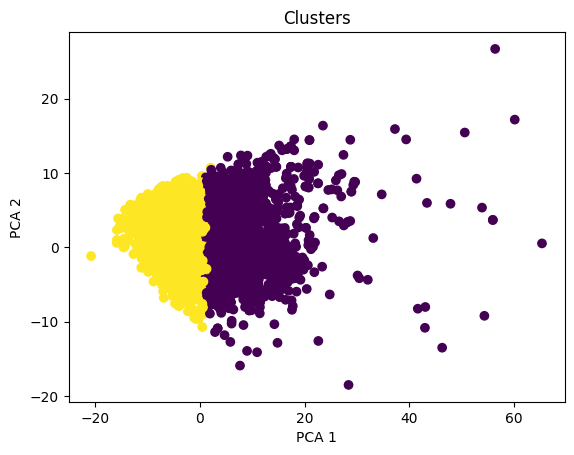

In [ ]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters')
plt.show()


# Conclusão

# Machine-learning

com descritores de antes

In [92]:
l.append("Y")

In [93]:
df[l]

,MaxAbsEStateIndex,MinAbsEStateIndex,NumValenceElectrons,FpDensityMorgan3,FpDensityMorgan2,FpDensityMorgan1,MolWt,qed,BertzCT,Y
0,12.820479,0.128619,126.0,2.625000,1.916667,1.166667,362.476,0.457873,745.10614,1
1,6.126257,0.660427,88.0,2.388889,1.611111,0.888889,255.708,0.756902,661.56570,1
2,5.719940,0.075509,164.0,2.387097,1.709677,1.000000,421.549,0.605920,974.84500,1
3,12.040634,0.006714,122.0,2.791667,2.000000,1.208333,324.344,0.728361,818.19965,1
4,13.082813,0.018472,194.0,2.861111,2.083333,1.222222,495.628,0.457249,1197.71120,0
...,...,...,...,...,...,...,...,...,...,...
11929,12.346902,0.024123,102.0,2.578947,1.894737,1.210526,263.293,0.682518,483.83765,0
11930,9.674588,0.174259,82.0,2.866667,2.200000,1.466667,210.229,0.635371,316.54962,0
11931,13.390758,0.162294,152.0,2.586207,1.827586,1.068966,397.427,0.455270,891.82336,0
11932,13.179767,0.077392,138.0,2.346154,1.653846,1.000000,357.406,0.772281,747.82825,0


In [100]:
from sklearn.model_selection import train_test_split

X = df[l].drop(['Y'],axis=1)
y = df[l]['Y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8353, 9), (3581, 9), (8353,), (3581,))

In [101]:
import math  
import sklearn.metrics  
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, predictions)  
rmse = math.sqrt(mse) 

rmse

0.432294274570474

In [103]:
from sklearn.ensemble import RandomForestRegressor

random_regressor = RandomForestRegressor()

random_regressor.fit(X_train, y_train)
preds = random_regressor.predict(X_test)

mean_error = sklearn.metrics.mean_squared_error(y_test, preds)  
root_mean = math.sqrt(mean_error) 
root_mean

0.4102753432153889

In [104]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math

svm_regressor = SVR()

svm_regressor.fit(X_train, y_train)

preds = svm_regressor.predict(X_test)

mean_error = mean_squared_error(y_test, preds)
root_mean = math.sqrt(mean_error)
root_mean

0.45654632755675995

In [105]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math

mlp_regressor = MLPRegressor()

mlp_regressor.fit(X_train, y_train)

preds = mlp_regressor.predict(X_test)

mean_error = mean_squared_error(y_test, preds)
root_mean = math.sqrt(mean_error)
root_mean

0.4737785991851263

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)

preds = knn_regressor.predict(X_test)

mean_error = mean_squared_error(y_test, preds)
root_mean = math.sqrt(mean_error)
root_mean

0.4545835327149261

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

preds = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, preds)
accuracy

0.6431164479195756

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math

decision_tree_regressor = DecisionTreeRegressor()

decision_tree_regressor.fit(X_train, y_train)

preds = decision_tree_regressor.predict(X_test)

mean_error = mean_squared_error(y_test, preds)
root_mean = math.sqrt(mean_error)
root_mean

0.5687820190544571

deep learning

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape, test_data.shape)
print(len(train_labels), len(test_labels))
print(train_data[0])
print(train_labels[0])

In [ ]:
from tensorflow.keras.datasets import imdb
imdb.load_data(num_words=10000)

In [44]:
df_cyp2c9

,ids,smiles,Y
0,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1
1,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
2,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
3,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
4,645164.0,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,0
...,...,...,...
11929,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
11930,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0
11931,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
11932,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [45]:
df_features
scale = StandardScaler()
scaled = pd.DataFrame(scale.fit_transform(df_features), columns=df_features.columns)
scaled

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.574700,0.482532,0.574700,-0.284644,-0.803185,0.068444,0.094658,0.068422,-0.123722,0.0,...,2.759501,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,1.126202,-0.206665
1,-1.914298,1.067168,-1.914298,2.080461,0.759965,-0.911224,-0.863511,-0.914591,-1.054494,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
2,-2.065372,0.457004,-2.065372,-0.520839,-0.029283,0.610479,0.540902,0.612039,0.807050,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,9.719883,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
3,0.284744,0.464805,0.284744,-0.826792,0.610769,-0.281443,-0.255938,-0.280093,-0.221698,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,9.719883,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
4,0.672239,0.578351,0.672239,-0.774498,-0.806448,1.290203,1.201313,1.292093,1.541870,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,9.719883,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,0.398618,0.053769,0.398618,-0.749369,0.371130,-0.841627,-0.858376,-0.840562,-0.711578,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
11930,-0.594983,0.053845,-0.594983,-0.081669,0.124672,-1.328525,-1.344139,-1.327629,-1.201458,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
11931,0.786737,-0.097372,0.786737,-0.134883,-0.816793,0.389143,0.385019,0.390613,0.513122,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665
11932,0.708288,-0.195253,0.708288,-0.512467,0.840357,0.021923,-0.003485,0.023245,0.170206,0.0,...,-0.313076,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665


merge dos dataframes

In [46]:
df_temp = pd.concat([scaled, df_cyp2c9], axis=1, join='inner')
df_temp
df_merged = df_temp.drop(columns=["ids", "smiles"])
df_merged

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Y
0,0.574700,0.482532,0.574700,-0.284644,-0.803185,0.068444,0.094658,0.068422,-0.123722,0.0,...,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,1.126202,-0.206665,1
1,-1.914298,1.067168,-1.914298,2.080461,0.759965,-0.911224,-0.863511,-0.914591,-1.054494,0.0,...,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,1
2,-2.065372,0.457004,-2.065372,-0.520839,-0.029283,0.610479,0.540902,0.612039,0.807050,0.0,...,-0.271332,-0.105757,-0.064864,9.719883,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,1
3,0.284744,0.464805,0.284744,-0.826792,0.610769,-0.281443,-0.255938,-0.280093,-0.221698,0.0,...,-0.271332,-0.105757,-0.064864,9.719883,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,1
4,0.672239,0.578351,0.672239,-0.774498,-0.806448,1.290203,1.201313,1.292093,1.541870,0.0,...,-0.271332,-0.105757,-0.064864,9.719883,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,0.398618,0.053769,0.398618,-0.749369,0.371130,-0.841627,-0.858376,-0.840562,-0.711578,0.0,...,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,0
11930,-0.594983,0.053845,-0.594983,-0.081669,0.124672,-1.328525,-1.344139,-1.327629,-1.201458,0.0,...,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,0
11931,0.786737,-0.097372,0.786737,-0.134883,-0.816793,0.389143,0.385019,0.390613,0.513122,0.0,...,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,0
11932,0.708288,-0.195253,0.708288,-0.512467,0.840357,0.021923,-0.003485,0.023245,0.170206,0.0,...,-0.271332,-0.105757,-0.064864,-0.096236,-0.170635,-0.012947,-0.250734,-0.164997,-0.206665,0


In [79]:
cols = ["MaxAbsEStateIndex", "qed", "Y"]
df_reduz = df_merged[cols]
df_reduz

,MaxAbsEStateIndex,qed,Y
0,0.574700,-0.803185,1
1,-1.914298,0.759965,1
2,-2.065372,-0.029283,1
3,0.284744,0.610769,1
4,0.672239,-0.806448,0
...,...,...,...
11929,0.398618,0.371130,0
11930,-0.594983,0.124672,0
11931,0.786737,-0.816793,0
11932,0.708288,0.840357,0


Criação dos conjuntos de dados de treino e teste. 30% das amostras para teste 

In [47]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [48]:
X = df_merged.drop('Y', axis=1)   #cheira-me que vamos ter de selecionar variaveis senao da asneira
y = df_merged['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

prev = model.predict(X_test)
prev

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
confusion_matrix(y_test, prev, labels=[0, 1])

array([[2074,  306],
       [ 424,  777]], dtype=int64)

In [ ]:
f1_score(y_test, prev, pos_label=1)

0.7037199124726476

In [ ]:
accuracy_score(y_test, prev)

0.7961463278413851

Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)

prev1 = model_gaus.predict(X_test)
prev1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
confusion_matrix(y_test, prev1, labels=[0, 1])

array([[ 578, 1802],
       [  34, 1167]], dtype=int64)

In [ ]:
f1_score(y_test, prev1, pos_label=1)

0.5597122302158273

In [ ]:
accuracy_score(y_test, prev1)

0.48729405194079867

k-Nearest Neighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier       
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 31))}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

best_k = grid_search.best_params_['n_neighbors']
print(best_k)

22


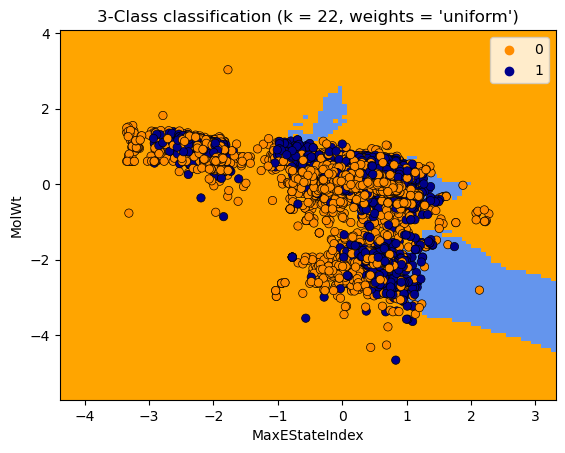

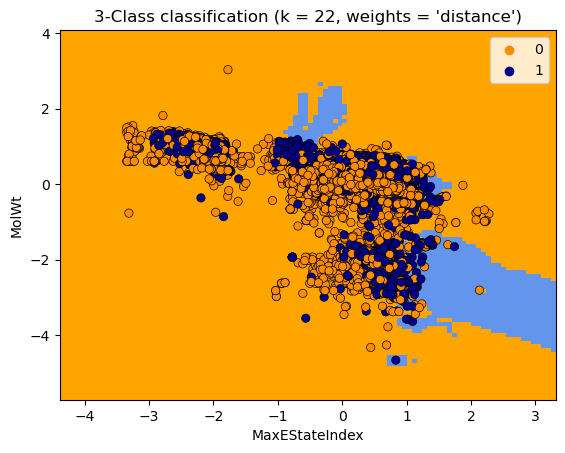

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 22

X = df_merged.iloc[:,0:2].values
y = df_merged["Y"].values

cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="MaxEStateIndex",
        ylabel="MolWt",
        shading="auto",
    )

    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=df_merged["Y"].values,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=22)   
knn.fit(X_train, y_train)

prev2 = knn.predict(X_test)
prev2

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

In [81]:
from sklearn.utils import Bunch
features = df_reduz.drop('Y', axis=1)
target = df_reduz['Y']
features_array = features.values
target_array = target.values
data = Bunch(data=features_array, target=target_array)
type(data)

sklearn.utils._bunch.Bunch

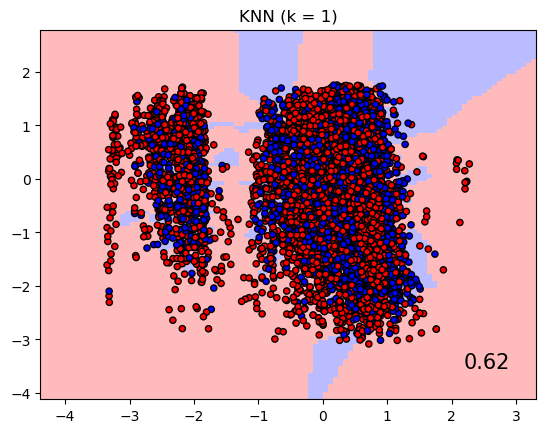

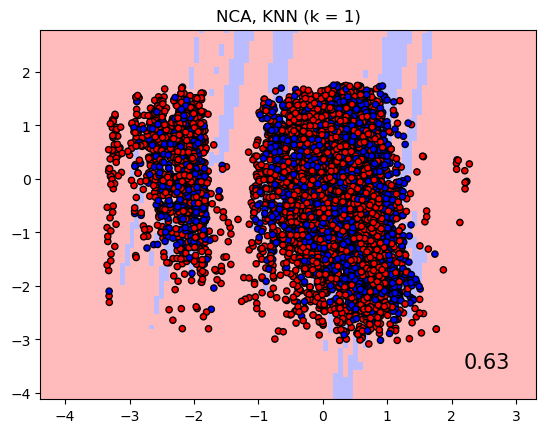

In [83]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay


n_neighbors = 1

dataset = data
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

DecisionTreeClassifier

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
prev3 = clf.predict(X_test)
prev3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print(tree.plot_tree(clf)) #bruh

[Text(0.4200402295809043, 0.9883720930232558, 'x[121] <= -0.003\ngini = 0.447\nsamples = 11934\nvalue = [7909, 4025]'),
 Text(0.18677717416331704, 0.9651162790697675, 'x[66] <= -0.298\ngini = 0.255\nsamples = 5629\nvalue = [4784, 845]'),
 Text(0.0746324431207844, 0.9418604651162791, 'x[60] <= 0.035\ngini = 0.151\nsamples = 3628\nvalue = [3329, 299]'),
 Text(0.05432506651454392, 0.9186046511627907, 'x[68] <= 2.174\ngini = 0.093\nsamples = 2425\nvalue = [2307, 118]'),
 Text(0.04346071107360254, 0.8953488372093024, 'x[45] <= -0.803\ngini = 0.086\nsamples = 2395\nvalue = [2287, 108]'),
 Text(0.03279911808904256, 0.872093023255814, 'x[66] <= -0.433\ngini = 0.196\nsamples = 282\nvalue = [251, 31]'),
 Text(0.02846850673791625, 0.8488372093023255, 'x[0] <= 0.549\ngini = 0.135\nsamples = 248\nvalue = [230, 18]'),
 Text(0.02606261154284608, 0.8255813953488372, 'x[57] <= 1.658\ngini = 0.105\nsamples = 234\nvalue = [221, 13]'),
 Text(0.024137895386789943, 0.8023255813953488, 'x[101] <= -1.058\ngin

Error in callback <function flush_figures at 0x000001CD332FB790> (for post_execute):


KeyboardInterrupt: 

Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

c:\Users\gonca\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)